#**A PROBABILISTIC GRAPHICAL MODEL APPROACH TO HEART DISEASE PREDICTION USING UCI CLEVELAND DATASET**


#***Abstract***


Heart disease is one of the leading causes of mortality worldwide. Early prediction of heart disease risk can significantly improve patient outcomes by enabling timely intervention. This study investigates the application of probabilistic graphical models (PGMs), specifically Bayesian Networks, to predict the likelihood of heart disease using the UCI Cleveland Heart Disease dataset. We employed two popular PGM libraries, pgmpy and pomegranate, to construct, learn, and infer Bayesian models. Structure learning was performed via Hill-Climb Search in pgmpy, while pomegranate was applied with both predefined and learned structures. Experiments compared model accuracy, inference speed, and interpretability.

## ***I. Intoduction***

Cardiovascular diseases (CVDs) represent a major health burden globally, responsible for over 17 million deaths annually. Predicting the probability of heart disease is essential for preventive healthcare and clinical decision-making. Traditional machine learning approaches such as logistic regression, support vector machines, or neural networks achieve high predictive accuracy but often lack interpretability.

Probabilistic Graphical Models (PGMs), particularly Bayesian Networks (BNs), provide a principled framework for modeling conditional dependencies among variables. Unlike black-box classifiers, BNs yield interpretable probabilistic relationships, allowing clinicians to understand how risk factors such as age, cholesterol level, or chest pain influence heart disease outcomes.

This report explores the application of Bayesian Networks to heart disease prediction, focusing on two state-of-the-art open-source libraries: pgmpy and pomegranate.

## ***II. Related works***

Bayesian networks have been applied to medical diagnosis tasks for decades. Early works demonstrated their utility in modeling causal relationships in disease progression. For heart disease, several studies have benchmarked BNs on the UCI Cleveland dataset, reporting competitive performance compared to logistic regression and decision trees.

Recent frameworks such as pgmpy (Python) provide comprehensive support for Bayesian Network learning and inference . Meanwhile, pomegranate offers high-performance implementations of probabilistic models, including Bayesian Networks and Hidden Markov Models . Comparative studies show that pgmpy is often favored for exact inference, while pomegranate provides speed and flexibility with approximate inference .

## ***III. Problem Statements and Related Definitions***

### ***3.1 Problem Statement***

Given a dataset of patient attributes $ X = \{x_1, x_2, \ldots, x_n\} $, including demographic and clinical risk factors, the goal is to predict the target variable $ Y $ representing the presence of heart disease.

Formally:

- **Learning phase**: Given training data $ (X, Y) $, learn the Bayesian Network structure $ G $ and conditional probability tables (CPTs) $ \theta $.

- **Inference phase**: For a new patient with partial evidence $ X_e \subseteq X $, compute the posterior distribution:

$$
P(Y \mid X_e, G, \theta)
$$

### ***3.2 Related Definitions***

**Probabilistic Graphical Model (PGM):**  
A statistical model that represents the joint probability distribution of a set of random variables using a graph, where nodes correspond to variables and edges encode conditional dependencies.  

**Bayesian Network (BN):**  
A directed acyclic graph (DAG) representing variables and their conditional dependencies. The joint distribution factorizes as:  

$$
P(X_1, X_2, \ldots, X_n) = \prod_{i=1}^n P(X_i \mid Pa(X_i))
$$  

where $Pa(X_i)$ denotes the parent set of $X_i$.  

**Structure Learning:**  
The process of determining the network structure $G$ from data, typically using scoring functions (e.g., BIC, K2) combined with search strategies (e.g., Hill-Climb Search).  

**Parameter Learning:**  
The estimation of CPTs $\theta$, usually performed via Maximum Likelihood Estimation (MLE) or Bayesian Estimation, based on the given network structure.  

**Inference:**  
The computation of posterior probabilities of unobserved variables given observed evidence.  
For example, estimating:  

$$
P(Y=1 \mid X_e)
$$  

allows us to infer the likelihood of heart disease for a new patient based on available risk factors.  


In [ ]:
# ==========================================================
# BAYESIAN NETWORK - HEART DISEASE PREDICTION (FRAMINGHAM)
# Thư viện: bnlearn + gRain
# ==========================================================

# --- 1. Cài đặt thư viện cần thiết ---
required_pkgs <- c("bnlearn", "gRain", "pROC", "arules")
new <- required_pkgs[!(required_pkgs %in% installed.packages()[,"Package"])]
if(length(new)) install.packages(new, repos="https://cloud.r-project.org")
lapply(required_pkgs, library, character.only = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gRbase’, ‘igraph’, ‘RcppArmadillo’, ‘RcppEigen’


Loading required package: gRbase


Attaching package: ‘gRbase’


The following objects are masked from ‘package:bnlearn’:

    ancestors, children, nodes, parents


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:bnlearn’:

    discretize


The following objects are masked from ‘package:base’:

    abbreviate, write




[[1]]
[1] "bnlearn"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
 [1] "gRain"     "gRbase"    "bnlearn"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "pROC"      "gRain"     "gRbase"    "bnlearn"   "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "arules"    "Matrix"    "pROC"      "gRain"     "gRbase"    "bnlearn"  
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"

In [ ]:
# --- 2. Đọc dữ liệu ---
data <- read.csv("framingham.csv", stringsAsFactors = FALSE)
# data <- na.omit(data)
data$TenYearCHD <- factor(data$TenYearCHD, levels = c(0,1), labels = c("No","Yes"))

# Xem kích thước dữ liệu (số dòng và cột)
dim(data)

# Xem tên các cột
names(data)

# Xem cấu trúc kiểu dữ liệu của từng cột
str(data)

# Xem 6 dòng đầu tiên
head(data)

# Xem 6 dòng cuối cùng
tail(data)

# Thống kê mô tả (min, max, mean, median, ...)
summary(data)

# Kiểm tra phân bố của biến mục tiêu
table(data$TenYearCHD)
prop.table(table(data$TenYearCHD))

# Đếm số NA theo từng cột
colSums(is.na(data))

[1] 4240   16

[1] "male"            "age"             "education"       "currentSmoker"  
 [5] "cigsPerDay"      "BPMeds"          "prevalentStroke" "prevalentHyp"   
 [9] "diabetes"        "totChol"         "sysBP"           "diaBP"          
[13] "BMI"             "heartRate"       "glucose"         "TenYearCHD"

'data.frame':	4240 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 2 1 1 1 ...


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,No
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,No
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,No
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,Yes
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,No
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,No


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
4235,1,51,3,1,43,0,0,0,0,207,126.5,80,19.71,65,68,No
4236,0,48,2,1,20,NA,0,0,0,248,131.0,72,22.00,84,86,No
4237,0,44,1,1,15,0,0,0,0,210,126.5,87,19.16,86,NA,No
4238,0,52,2,0,0,0,0,0,0,269,133.5,83,21.47,80,107,No
4239,1,40,3,0,0,0,0,1,0,185,141.0,98,25.60,67,72,No
4240,0,39,3,1,30,0,0,0,0,196,133.0,86,20.91,85,80,No


      male             age          education     currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.000   Median :0.0000  
 Mean   :0.4292   Mean   :49.58   Mean   :1.979   Mean   :0.4941  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.000   Max.   :1.0000  
                                  NA's   :105                     
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.006   Mean   :0.02961   Mean   :0.005896   Mean   :0.3106  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.0000


  No  Yes 
3596  644 


       No       Yes 
0.8481132 0.1518868 

male             age       education   currentSmoker      cigsPerDay 
              0               0             105               0              29 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
             53               0               0               0              50 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0              19               1             388 
     TenYearCHD 
              0

In [ ]:
# --- 3. (Tuỳ bạn) Làm sạch dữ liệu ---
# # Hiện tại giữ nguyên hành vi cũ: loại bỏ NA
data <- na.omit(data)
cat("Sau khi loại bỏ NA:", dim(data), "\n")

# Thống kê mô tả (min, max, mean, median, ...)
summary(data)

# Đếm số NA theo từng cột
colSums(is.na(data))

# Xem tổng số dòng chứa NA
sum(!complete.cases(data))


Sau khi loại bỏ NA: 3658 16 


      male             age          education    currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.00   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.00   Median :0.0000  
 Mean   :0.4437   Mean   :49.55   Mean   :1.98   Mean   :0.4891  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.00   Max.   :1.0000  
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.025   Mean   :0.03034   Mean   :0.005741   Mean   :0.3116  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000  
    diabetes          totChol     

male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

[1] 0

In [ ]:
# # --- 4. Chuyển đổi biến mục tiêu sang factor với nhãn rõ ràng ---
target_col <- "TenYearCHD"
# data[[target_col]] <- factor(data[[target_col]], levels = c(0,1), labels = c("No","Yes"))
# cat("Levels của target:", levels(data[[target_col]]), "\n")
# # Đếm số NA theo từng cột
colSums(is.na(data))

Levels của target: No Yes 


male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

In [ ]:
# --- 5. Xem nhanh số lượng giá trị khác nhau trên từng cột ---
unique_counts <- sapply(data, function(x) length(unique(x)))
print(unique_counts)

           male             age       education   currentSmoker      cigsPerDay 
              2              39               4               2              33 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              2               2               2               2             241 
          sysBP           diaBP             BMI       heartRate         glucose 
            231             142            1298              72             138 
     TenYearCHD 
              2 


In [ ]:
# --- 6. Quyết định cột nào rời rạc hóa ---
# - Những cột numeric có >= 3 giá trị khác nhau -> rời rạc hóa thành 3 bins
# - Những cột numeric có 1-2 giá trị -> chuyển thành factor (nhị phân)
numeric_cols <- names(data)[sapply(data, is.numeric)]
numeric_cols <- setdiff(numeric_cols, target_col)  # chỉ numeric, loại trừ target nếu có

cols_to_discretize <- numeric_cols[sapply(data[numeric_cols], function(x) length(unique(x)) >= 3)]
cols_to_factor     <- setdiff(numeric_cols, cols_to_discretize)

cat("Cột sẽ rời rạc hóa (>=3 giá trị):", paste(cols_to_discretize, collapse = ", "), "\n")
cat("Cột numeric sẽ chuyển thành factor (1-2 giá trị):", paste(cols_to_factor, collapse = ", "), "\n")

# --- Chuyển toàn bộ cột nhị phân (0/1) sang factor ---
binary_cols <- names(data)[sapply(data, function(x) all(x %in% c(0,1)))]
cat("Các cột nhị phân:", binary_cols, "\n")

for (col in binary_cols) {
  data[[col]] <- factor(data[[col]], levels = c(0,1), labels = c("No","Yes"))
  cat(sprintf("Đã chuyển cột '%s' sang factor (No/Yes)\n", col))
}

for (col in binary_cols) {
  data[[col]] <- as.factor(data[[col]])
}

# Đếm số NA theo từng cột
colSums(is.na(data))

Cột sẽ rời rạc hóa (>=3 giá trị): age, education, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose 
Cột numeric sẽ chuyển thành factor (1-2 giá trị): male, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes 
Các cột nhị phân: male currentSmoker BPMeds prevalentStroke prevalentHyp diabetes 
Đã chuyển cột 'male' sang factor (No/Yes)
Đã chuyển cột 'currentSmoker' sang factor (No/Yes)
Đã chuyển cột 'BPMeds' sang factor (No/Yes)
Đã chuyển cột 'prevalentStroke' sang factor (No/Yes)
Đã chuyển cột 'prevalentHyp' sang factor (No/Yes)
Đã chuyển cột 'diabetes' sang factor (No/Yes)


male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

In [ ]:
# # --- 7. Chuyển các cột numeric ít giá trị thành factor (nhị phân/hạng) ---
# if (length(cols_to_factor) > 0) {
#   data[cols_to_factor] <- lapply(data[cols_to_factor], function(x) factor(x))
# }
# # Đếm số NA theo từng cột
colSums(is.na(data))

male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

In [ ]:
# --- 8. Rời rạc hóa các cột numeric đủ giá trị ---
if (length(cols_to_discretize) > 0) {
  for (col in cols_to_discretize) {
    uv <- length(unique(data[[col]]))
    if (uv >= 3) {
      tryCatch({
        # Rời rạc hóa trước, không gán nhãn
        tmp <- discretize(data[[col]], method = "frequency", breaks = 3)
        k <- length(levels(tmp))  # số bins thực tế
        labs <- c("Low","Medium","High")[1:k]
        levels(tmp) <- labs
        data[[col]] <- tmp
      }, error = function(e) {
        message(sprintf("Lỗi khi rời rạc hóa %s: %s -> chuyển sang factor", col, e$message))
        data[[col]] <<- factor(data[[col]])
      })
    } else {
      message(sprintf("Bỏ qua rời rạc hóa %s vì chỉ có %d giá trị khác nhau", col, uv))
      data[[col]] <- factor(data[[col]])
    }
  }
}
# Đếm số NA theo từng cột
colSums(is.na(data))

Warning message in discretize(data[[col]], method = "frequency", breaks = 3):
“The calculated breaks are: 1, 1, 2, 4
  Only unique breaks are used reducing the number of intervals. Look at ? discretize for details.”
Warning message in discretize(data[[col]], method = "frequency", breaks = 3):
“The calculated breaks are: 0, 0, 15, 70
  Only unique breaks are used reducing the number of intervals. Look at ? discretize for details.”


male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

In [ ]:
# --- 9. Kiểm tra lại: mọi cột đều là factor (rời rạc) để bnlearn xử lý ---
cat("Kiểm tra kiểu mỗi cột (factor ?):\n")
print(sapply(data, class))
# Đếm số NA theo từng cột
colSums(is.na(data))

Kiểm tra kiểu mỗi cột (factor ?):
           male             age       education   currentSmoker      cigsPerDay 
       "factor"        "factor"        "factor"        "factor"        "factor" 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
       "factor"        "factor"        "factor"        "factor"        "factor" 
          sysBP           diaBP             BMI       heartRate         glucose 
       "factor"        "factor"        "factor"        "factor"        "factor" 
     TenYearCHD 
       "factor" 


male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

In [ ]:
# --- 10. Chia dữ liệu Train/Test (70/30) ---
set.seed(123)
train_idx <- sample(seq_len(nrow(data)), size = floor(0.85 * nrow(data)))
train_data <- data[train_idx, , drop = FALSE]
test_data  <- data[-train_idx, , drop = FALSE]

cat("Tập train:", nrow(train_data), " | Tập test:", nrow(test_data), "\n")
# Đếm số NA theo từng cột
colSums(is.na(data))

Tập train: 3109  | Tập test: 549 


male             age       education   currentSmoker      cigsPerDay 
              0               0               0               0               0 
         BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
              0               0               0               0               0 
          sysBP           diaBP             BMI       heartRate         glucose 
              0               0               0               0               0 
     TenYearCHD 
              0

In [ ]:
# --- 11A. Mô hình Naive Bayes ---
cat("\n=== Mô hình Naive Bayes (bnlearn) ===\n")
nb_model <- naive.bayes(train_data, training = target_col)
fitted_nb <- bn.fit(nb_model, data = train_data)

# Dự đoán bằng Naive Bayes
pred_nb <- predict(fitted_nb, node = target_col, data = test_data)
cat("Confusion Matrix Naive Bayes:\n")
print(table(Predicted = pred_nb, Actual = test_data[[target_col]]))


# --- 11B. Mô hình Hill-Climbing ---
cat("\n=== Mô hình Hill-Climbing (bnlearn) ===\n")
hc_model <- hc(train_data)
fitted_hc <- bn.fit(hc_model, data = train_data)

# Dự đoán bằng HC
pred_hc <- predict(fitted_hc, node = target_col, data = test_data)
cat("Confusion Matrix Hill-Climbing:\n")
print(table(Predicted = pred_hc, Actual = test_data[[target_col]]))


# --- So sánh nhanh Accuracy ---
acc_nb <- mean(pred_nb == test_data[[target_col]])
acc_hc <- mean(pred_hc == test_data[[target_col]])

cat(sprintf("\nAccuracy Naive Bayes: %.3f\n", acc_nb))
cat(sprintf("Accuracy Hill-Climbing: %.3f\n", acc_hc))


=== Mô hình Naive Bayes (bnlearn) ===


Warning message in check.unused.args(list(...), character(0)):
“unused argument(s): 'node'.”


Confusion Matrix Naive Bayes:
         Actual
Predicted  No Yes
      No  386  70
      Yes  69  24

=== Mô hình Hill-Climbing (bnlearn) ===
Confusion Matrix Hill-Climbing:
         Actual
Predicted  No Yes
      No  455  94
      Yes   0   0

Accuracy Naive Bayes: 0.747
Accuracy Hill-Climbing: 0.829



Attaching package: ‘igraph’


The following object is masked from ‘package:arules’:

    union


The following objects are masked from ‘package:gRbase’:

    edges, is_dag, topo_sort


The following objects are masked from ‘package:bnlearn’:

    as.igraph, compare, degree, subgraph


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




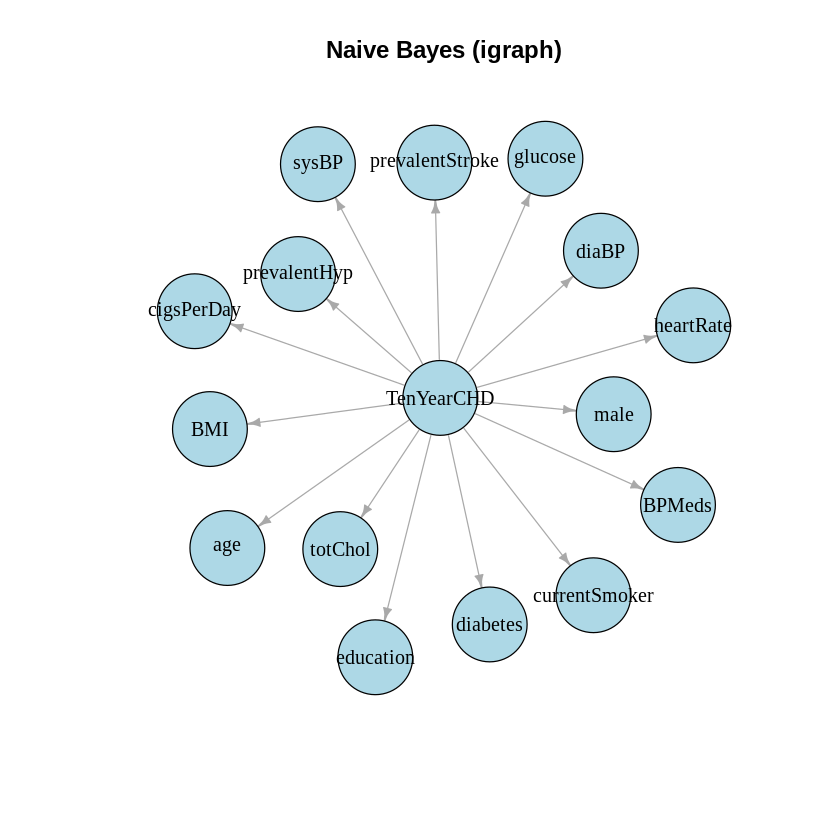

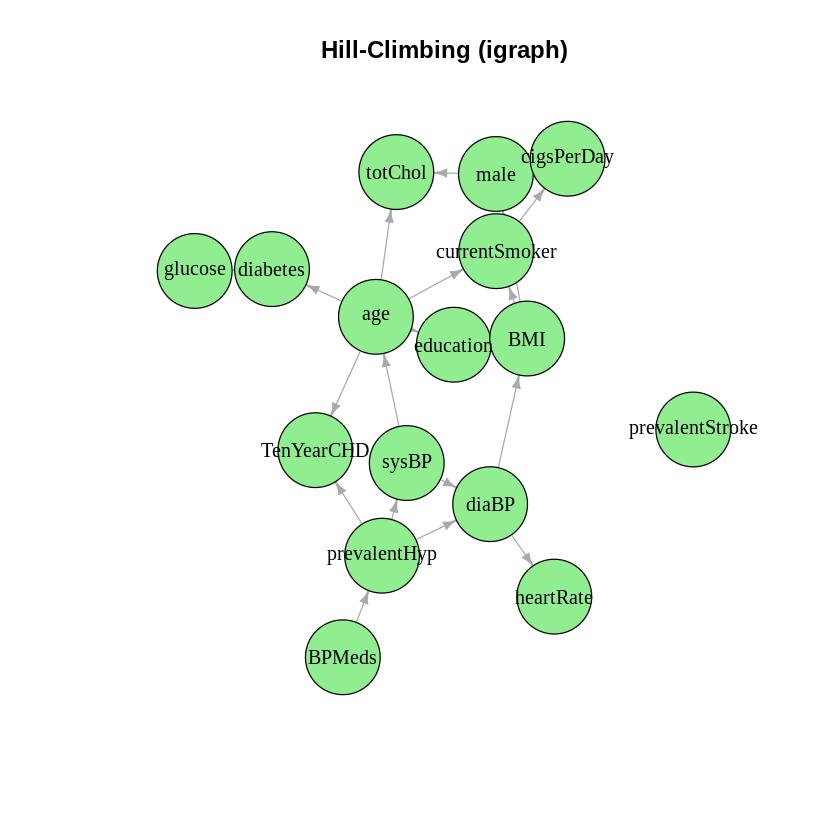

In [ ]:
library(igraph)

# 3. Naive Bayes với igraph
g <- as.igraph(nb_model)
plot(g, layout = layout_with_fr,
     vertex.size = 30,
     vertex.color = "lightblue",
     vertex.label.color = "black",
     edge.arrow.size = 0.5,
     main = "Naive Bayes (igraph)")

# 4. Hill-Climbing với igraph
g2 <- as.igraph(hc_model)
plot(g2, layout = layout_with_fr,
     vertex.size = 30,
     vertex.color = "lightgreen",
     vertex.label.color = "black",
     edge.arrow.size = 0.5,
     main = "Hill-Climbing (igraph)")


In [ ]:
# --- 12. SUY DIỄN XÁC SUẤT VỚI gRain (Inference) ---
library(gRain)

# Chuyển mô hình Naive Bayes sang gRain
grain_nb <- as.grain(fitted_nb)

# Xem xác suất tiên nghiệm của bệnh tim
cat("\n=== Xác suất tiên nghiệm (Prior) của TenYearCHD ===\n")
print(querygrain(grain_nb, nodes = target_col)$TenYearCHD)

# Ví dụ: Giả sử người này là nam, hút thuốc, có huyết áp cao
evidence_list <- list(male = "Yes", currentSmoker = "Yes", BPMeds = "Yes")

grain_evid <- setEvidence(grain_nb, evidence = evidence_list)
posterior <- querygrain(grain_evid, nodes = target_col)$TenYearCHD

cat("\n=== Xác suất hậu nghiệm (Posterior) TenYearCHD | Evidence ===\n")
print(posterior)



=== Xác suất tiên nghiệm (Prior) của TenYearCHD ===
TenYearCHD
       No       Yes 
0.8510775 0.1489225 

=== Xác suất hậu nghiệm (Posterior) TenYearCHD | Evidence ===
TenYearCHD
       No       Yes 
0.6000856 0.3999144 
